# Baseline Models

Basic models using a keyword vector and "traditional" regression models.

First let's load the dataset in to memory. (Check out the readme for information on getting the data)

In [2]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from scipy import stats
from IPython.display import display
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

data = pandas.read_csv("/Users/toddbodnar/Dropbox/retweets_h7n9.csv",encoding='latin-1',names=["retweets","followers","text"],sep="\t")
print("Dataset:")
display(data.head())
print("Total rows: "+str(len(data[[1]])))

data_train, data_test = train_test_split(data,test_size = 0.9)

Dataset:


,retweets,followers,text
0,1,190,via #newzsocial H7N9 Bird Flu Cases Rise To 51...
1,1,760,China reports 5th H7N9 bird flu death _HTTPTW...
2,1,3168,La cepa H7N9 que origina la gripe aviar es gra...
3,1,551,Hah virus H7N9?virus H5N1 aja blm dpt dimusnah...
4,1,118,H7N9 Flu: China Investigating Possible Human-T...


Total rows: 194602


## A Trivial Model

We'll start with a really simple model where

$$retweets = \alpha * followers + \beta$$

In [3]:
#print(data[[1,2]])
simple_model = stats.linregress(data_train[[1,0]])
#print(simple_model)

Note that the two variables are **not** normally distributed, so we'll use Spearman's Rank coefficient (t) instead of correlation.

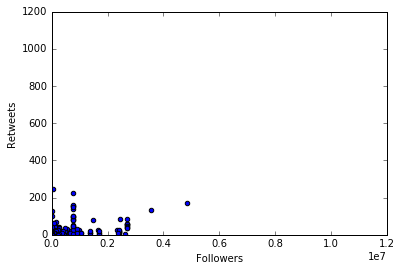

,Model,r (train),MSE (train),t (train),r (test),MSE (test),t (test)
0,Simple,0.515568,17.756869,0.293983,0.492567,21.61141,0.290765


In [4]:
import matplotlib.pyplot as plt

plt.scatter(data_train[[1]],data_train[[0]])
plt.xlim([0,1.2e7])
plt.ylim([0,1200])
plt.xlabel("Followers")
plt.ylabel("Retweets")
plt.show()

prediction_train = data_train[[1]]*simple_model.slope + simple_model.intercept
prediction_test = data_test[[1]]*simple_model.slope + simple_model.intercept
model_fits = pandas.DataFrame([["Simple",stats.pearsonr(prediction_train,data_train[[0]])[0][0],mean_squared_error(prediction_train,data_train[[0]]),stats.spearmanr(prediction_train,data_train[[0]])[0],stats.pearsonr(prediction_test,data_test[[0]])[0][0],mean_squared_error(prediction_test,data_test[[0]]),stats.spearmanr(prediction_test,data_test[[0]])[0]]],columns = ["Model","r (train)","MSE (train)","t (train)","r (test)","MSE (test)","t (test)"])

display(model_fits)

We're also using a 90%/10% train/test split of the initial data, this will help control overfitting later on.

## Keyword Vector Models

We'll now build fancier models based on vectors of keywords derived from the text of each tweet. For this demo, we're just going to use a binary response for each keyword (if keyword n is in the tweet, then element n of the vector is 1 and 0 otherwise.) There are more advanced approaches based on the frequencies of each word in the tweet or dataset, but, from previous experience, they don't do much better (probably because tweets are short and *roughly* the same length as each other, so a word will tend to appear either once or not at all in a tweet which would translate to either a frequency of 1/w or 0, where w is the average number of words in a tweet.)

First, let's look at the 100 most common words in our dataset:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

textToVector = CountVectorizer(min_df = 5, max_features = 100, binary=True)
train_text = textToVector.fit_transform(data_train["text"])

print(textToVector.get_feature_names())

['11', '20', '2013', '_httptweetco________', 'about', 'and', 'are', 'as', 'at', 'autism', 'aves', 'avian', 'aviar', 'aviária', 'be', 'beijing', 'bird', 'birdflu', 'burung', 'by', 'case', 'cases', 'casos', 'children', 'china', 'clinics', 'confirmed', 'da', 'de', 'death', 'deaths', 'del', 'di', 'educacionliberadora', 'el', 'en', 'epidemic', 'first', 'flu', 'for', 'from', 'gripe', 'grippe', 'h7n9', 'has', 'have', 'health', 'human', 'humanos', 'in', 'infection', 'influenza', 'is', 'it', 'jab', 'kasus', 'la', 'los', 'man', 'measles', 'mmr', 'more', 'más', 'new', 'news', 'no', 'not', 'number', 'of', 'oms', 'on', 'one', 'outbreak', 'over', 'people', 'por', 'que', 'reported', 'reports', 'rise', 'risk', 'rt', 'se', 'shanghai', 'spread', 'strain', 'swansea', 'taiwan', 'that', 'the', 'this', 'to', 'two', 'un', 'via', 'virus', 'vírus', 'who', 'with', 'world']


You should see a lot of words like "and," "of" or "the" which probably don't have much of an effect on the retweet rate, so we'll discard them.

In [6]:
textToVector = CountVectorizer(min_df = 5, max_features = 100, binary=True, stop_words='english')
train_text = textToVector.fit_transform(data_train["text"])

print(textToVector.get_feature_names())

['11', '14', '16', '20', '2013', '21', '_httptweetco________', 'april', 'autism', 'autistic', 'aves', 'aviaire', 'avian', 'aviar', 'aviaria', 'aviária', 'awareness', 'baru', 'beijing', 'bird', 'birdflu', 'burung', 'case', 'cases', 'casos', 'cepa', 'children', 'china', 'chine', 'chinese', 'clinics', 'confirma', 'confirmed', 'da', 'death', 'deaths', 'del', 'di', 'died', 'educacionliberadora', 'el', 'en', 'entre', 'epidemic', 'es', 'flu', 'gripe', 'grippe', 'h5n1', 'h7n9', 'health', 'human', 'humanos', 'infection', 'influenza', 'jab', 'kasus', 'ke', 'la', 'le', 'lethal', 'los', 'man', 'measles', 'mmr', 'muertos', 'más', 'na', 'new', 'news', 'number', 'officials', 'oms', 'outbreak', 'para', 'people', 'por', 'poultry', 'que', 'reported', 'reports', 'rise', 'risk', 'rt', 'say', 'says', 'se', 'shanghai', 'spread', 'strain', 'swansea', 'taiwan', 'una', 'update', 'vaccination', 'vaccine', 'virus', 'vírus', 'wales', 'world']


We'll now feed these vectors into a regression model, along with the follower count, to predict the number of retweets. Since we don't know which models will do better or worse, we'll test several models (linear regression, support vector regression, perceptron-based regression, and gradient boosting) and the maximum number of keywords to include in the vector (100,500, or all of them).

To speed this up, we're going to parallalize the models' evaluations. By default, we'll only use two threads, but you can increase that number (below) if you feel like your machine can handle it.

In [7]:
number_of_threads = 2 ##Default is 2, increasing this should decrease execution time, but increase resources used. May effect the system's performance if set too high!
extreme = False ##do more models and higher dimensionality vectors (but much slower)

In [14]:
import queue
import threading
import sklearn.linear_model
from scipy.sparse import csr_matrix



def worker_thread():
    while(True):
        job = jobQueue.get()
        if job is None:
            break
        model = sklearn.base.clone(models[job["model_name"]])
        textToVector = CountVectorizer(min_df = 5, max_features = job["max_features"], binary=True, stop_words='english')
        train_text = (textToVector.fit_transform(data_train[[2]]["text"])).todense()
        test_text = (textToVector.transform(data_test[[2]]["text"])).todense()
        train = np.concatenate((np.array(train_text),np.array(data_train[[1]])),axis=1)
        test = np.concatenate((np.array(test_text),np.array(data_test[[1]])),axis=1)
        model.fit(train,data_train[[0]]["retweets"])
        
        result = {}
        result["model_name"] = job["model_name"]+"_"+str(job["max_features"])
        result["r_train"] = stats.pearsonr(model.predict(train),data_train[["retweets"]]["retweets"])[0]
        result["r_test"] = stats.pearsonr(model.predict(test),data_test[["retweets"]]["retweets"])[0]
        result["mse_train"] = mean_squared_error(model.predict(train),data_train[["retweets"]]["retweets"])
        result["mse_test"] = mean_squared_error(model.predict(test),data_test[["retweets"]]["retweets"])
        result["t_train"] = stats.spearmanr(model.predict(train),data_train[["retweets"]]["retweets"])[0]
        result["t_test"] = stats.spearmanr(model.predict(test),data_test[["retweets"]]["retweets"])[0]
        
        results.append(result)
        
        
        
jobQueue = queue.Queue()
results = []

models = {}
models["linear_regression"] = sklearn.linear_model.LinearRegression()


key_sizes = [10,50,100,500]

if extreme:
    key_sizes.append(1000)
    key_sizes.append(5000)
    key_sizes.append(None)

for model in models:
    for key_count in key_sizes:
        job = {}
        job["model_name"] = model
        job["max_features"] = key_count
        jobQueue.put(job)
        
threads = []

for i in range(number_of_threads):
    jobQueue.put(None)
    thread = threading.Thread(target=worker_thread)
    thread.start()
    threads.append(thread)
    
for thread in threads:
    thread.join()
    
for result in results:
    model_fits = model_fits.append(pandas.DataFrame([[result["model_name"],result["r_train"],result["mse_train"],result["t_train"],result["r_test"],result["mse_test"],result["t_test"]]],columns = ["Model","r (train)","MSE (train)","t (train)","r (test)","MSE (test)","t (test)"]))

display(model_fits)


,Model,r (train),MSE (train),t (train),r (test),MSE (test),t (test)
0,Simple,0.515568,17.756869,0.293983,0.492567,21.611410,0.290765
0,linear_regression_100,0.530908,17.368627,0.191367,0.491953,21.636319,0.192500
0,linear_regression_500,0.557237,16.675714,0.188714,0.479865,22.039490,0.173111
0,linear_regression_10,0.520659,17.629288,0.200746,0.493559,21.585064,0.203473
0,linear_regression_50,0.528654,17.426391,0.200380,0.493230,21.597827,0.203191
0,linear_regression_100,0.530908,17.368627,0.191367,0.491953,21.636319,0.192500
0,linear_regression_500,0.557237,16.675714,0.188714,0.479865,22.039490,0.173111
